# 2. Autoencoder

In [1]:
import numpy as np
import torch.optim as optim
from torch.utils.data import DataLoader

from data import *
from autoencoder import *

from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')

from tqdm import tqdm

df = pipeline()
time_steps = 24
datasets = samples(df, time_steps)

## Train autoencoder

### Set up

In [2]:
batch_size = 128
learning_rate = 0.001

model = Autoencoder()
train_dataloader = DataLoader(TrafficDataset(datasets),
                              batch_size=batch_size,
                              shuffle=True)
optimiser = optim.Adam(lr=learning_rate,
                       params=model.parameters())

### Training loop

In [3]:
num_epochs = 2
pbar = tqdm(range(num_epochs))
losses = []

for epoch in pbar:
    for i, (x,y) in enumerate(train_dataloader):
        x_hat = model(x)
        
        optimiser.zero_grad()
        loss = F.mse_loss(x, x_hat)
        loss.backward()
        optimiser.step()
        
        step = (epoch * len(train_dataloader.dataset) +
                i * batch_size + len(x))
        losses.append([step, loss.item()])
        pbar.set_description("Epoch={0} | [{1:>5}|{2}]\t loss={3:.4f}"
                             .format(epoch,
                                     i * batch_size + len(x),
                                     len(train_dataloader.dataset),
                                     loss.item()))

Epoch=1 | [11501|11501]	 loss=0.0647: 100%|██████████| 2/2 [04:55<00:00, 147.53s/it]


## Plot training loss after 2 epochs

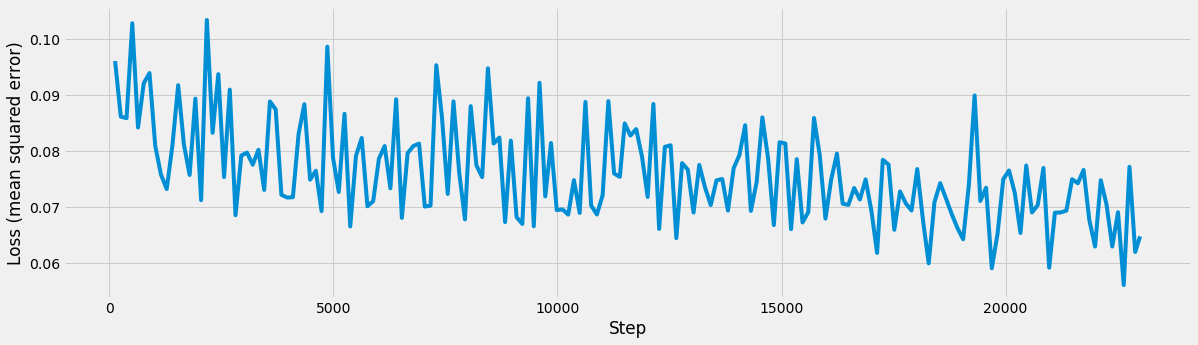

In [4]:
fig = plt.figure(figsize=(18,5))
ax  = fig.add_subplot(1,1,1)
_   = ax.plot(*np.array(losses).T,label='training loss')
_   = ax.set_ylabel('Loss (mean squared error)')
_   = ax.set_xlabel('Step')

## Plot some samples after two epochs

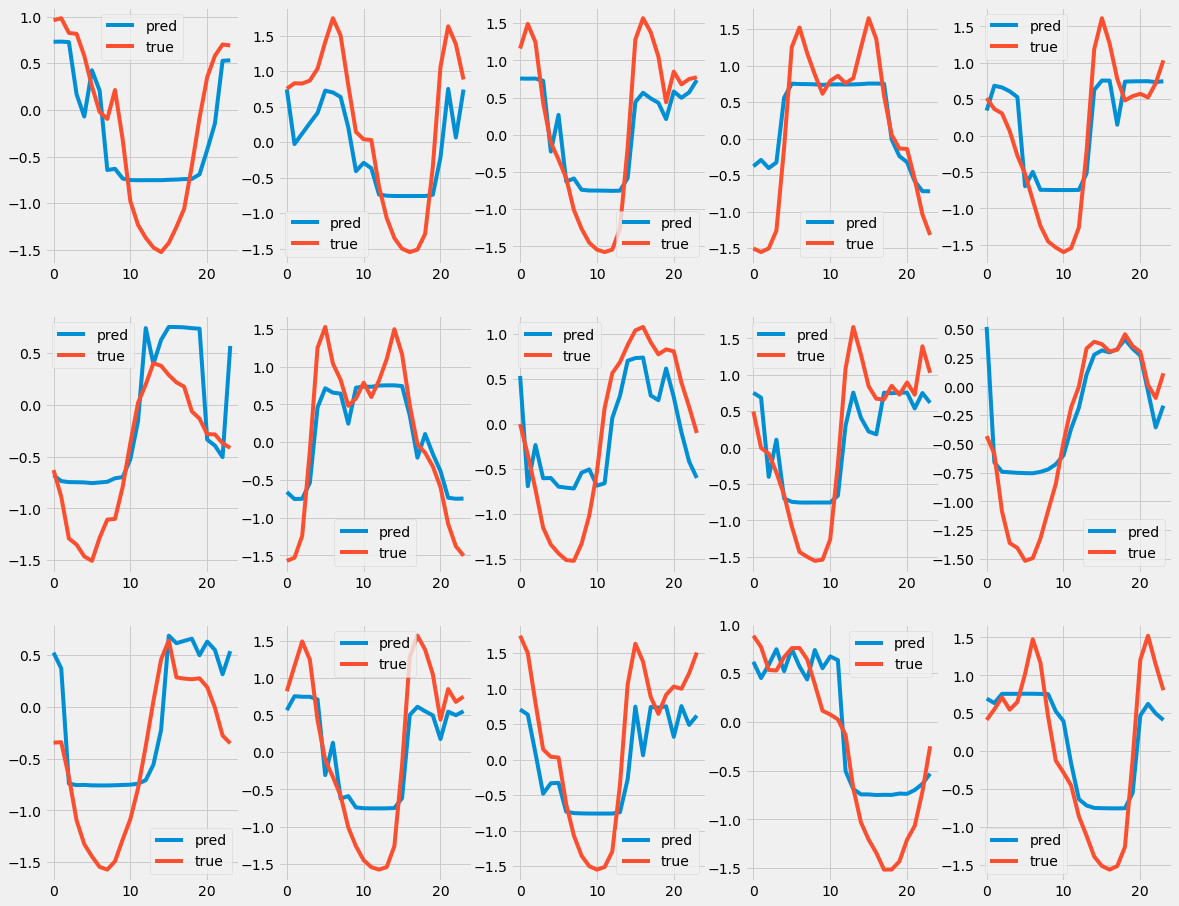

In [9]:
test_dataloader = DataLoader(TrafficDataset(datasets,set_='test'),
                              batch_size=1000,
                              shuffle=True)
for x,_ in test_dataloader:
    break
fig = plt.figure(figsize=(6*5,3*3))
for i in range(80,95):
    ax = fig.add_subplot(3,5,i-80+1)
    ax.plot(model(x)[i].T[3].detach().numpy(),label='pred')
    ax.plot(x[i].T[3].numpy(),label='true')
    ax.legend()